# Excercise Set 4

## Excercise 1: Pulsar analysis with Point Spread Function

The Large Area Telescope (LAT) is one of two instru-ments currently in orbit aboard the Fermi satellite.  Itis able to map the entire sky in the energy range fromless than 20 MeV to more than 300 GeV. However, itfunctions more like a particle detector than an opticaltelescope.  As such, while optical telescopes have anangular resolution, the LAT has a point spread func-tion (PSF). The PSF describes the region of sky overwhich  a  point  source  appears  to  “smear  out”  whenviewed by the LAT.

In this problem, you will produce a rough simulation of PSR B1509-58, a soft gammaray pulsar, as seen by the Fermi LAT.

### Part a:

The spectrum of PSR B1509-58 can be described by a power law with exponential cutoff:

$$ F(E) = k*E^{-\alpha} \exp{-\frac{E}{E_c}}$$

where $\alpha = 1.87$ is the spectral index, $k = 1 \times 10^{-4}s^{-1}cm^{-2}$ is a normalization factor, and $E_c = 81 \mathrm{MeV}$ is the energy cutoff. Normalize this distrobution, and use it to generate 100,000 photon energies from $E = 20 \mathrm{MeV}$ to $E=500 \mathrm{MeV}$. Plot the distrobution in a log-log histogram.

The integral of $F(E)$ from $20 \mathrm{MeV}$ to $500 \mathrm{MeV}$ is about $4.14575 \times 10^{-6}$ so in order to normailze $F(E)$ we redifne $F(E)$ to be $F(E) = A* k*E^{-\alpha} \exp{-\frac{E}{E_c}}$ where  $A = (4.14575 \times 10^{-6})^{-1}$.

Note that the maximum value of $F$ on the interval from $20 \mathrm{MeV}$ to $500 \mathrm{MeV}$ is $0.0695405$.

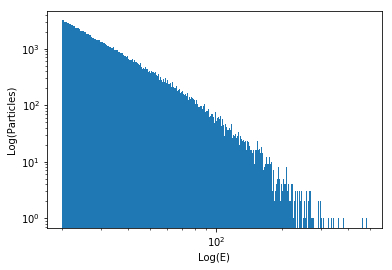

In [49]:
import random
import numpy as np
import matplotlib.pyplot as plt

#set values for constants as described above
alpha = 1.87
k = 0.0001
A = 1/(4.14575*10**(-6)) #normalization factor
E_c = 81
P = 100000

#define function to describe the normalized spectrum othe PSR B1509-58
def F(E):
    return A*k*pow(E, -alpha)*np.exp(-E/E_c)

#declare array to contain values of the energies of the accepted simulated particles
E_array = []

#declare variable to keep track of the number of particles accepted 
paccepted = 0


while paccepted < P: #while the number of particles accepted is below the acceptable threshold
    trial_E = random.uniform(20,500) #take a random energy value between 20keV and 500 keV
    trial_F = random.uniform(0,0.0695405) #take values of F between 0 and its maximum value on the interval
    if trial_F < F(trial_E): #if the randomly selected point is below the F curve
        E_array.append(trial_E) #append the randomly selected point into the array
        paccepted += 1 #and increment the number of particles accepted

        
#plot oa histogram of the energies of accepted particles
plt.hist(E_array, log = True, bins = 1000)
plt.xlabel('Log(E)')
plt.ylabel('Log(Particles)')
plt.semilogx()
plt.show()

E_array = []
paccepted = 0

### Part b:

We wil appproximate the Fermi PSF as as 2-D normal distribution in x and y (the actual function is much more complex). The 1-D normal distrubtion is given by:

$$ F(x | \mu, \sigma) = \frac{1}{\sqrt{2 \pi \sigma^2}}\exp \bigg(-\frac{(x-\mu)^2}{2 \sigma^2} \bigg)$$

where $\sigma$ is the standard deviation, and $\mu$ is the center of the peak. For Fermi, the value of $\sigma$ is energy dependent:

$$ \sigma = \bigg( \frac{E}{100\mathrm{MeV}}\bigg)^{-0.8} $$

PSR B1509-58 is located at equatorial coordiantes (right ascension [RA], declination [DEC])= (48.04, -30.92). Draw 100,000 photons of energy $100 \mathrm{MeV}$, and make a 2D histogram of their positions, with RA on the $x$ axis and DEC on the $y$ axis.

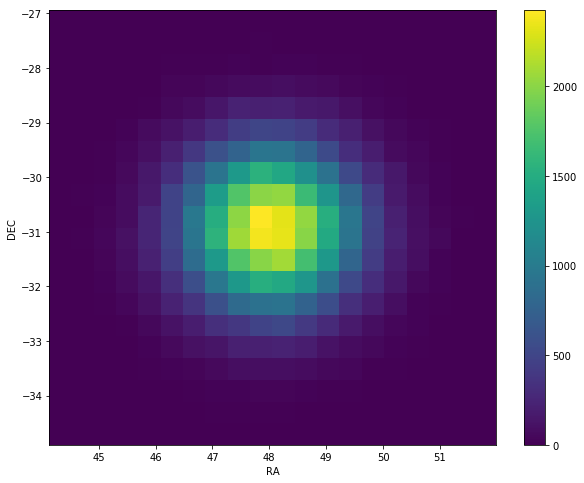

In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt

#set values of constants as defined above
E = 100
sigma = (E/100)**(-0.8)
P = 100000 #number of particles would like to accept

# define function to keep track of gaussian spread of position values at a given energy
def F(x, mu, sigma):
    return (1/np.sqrt(2*np.pi*sigma**2))*np.exp(-((x-mu)**2)/(2*sigma**2))

#declare arrays to store values of accepted RA and DEC coordinates
RA_values = []
DEC_values = []

#declare variables to keep track of the number of RA and DEC coordinates accepted
RAaccepted = 0
DECaccepted = 0

#define the center positions of the gaussians
mu_RA = 48.04
mu_DEC = -30.92

while RAaccepted < P: # while not enough RA coordinates have been accepted
    trial_RA = random.uniform(mu_RA-4*sigma,mu_RA+4*sigma) #choose a RA value within 4 sigma of the mean
    trial_F = random.uniform(0,1/np.sqrt(2*np.pi*sigma**2)) #and choose a random value of F between 0 and the max value of F
    if trial_F < F(trial_RA, mu_RA, sigma):#if the randomly chosen poin is below the gaussian, accept the RA coordinate
        RA_values.append(trial_RA) #append the new RA coordinate to the appropriate array
        RAaccepted += 1 #increment the counter for the number of accepted RA values

# same comments as the above while loop only this time we select the DEC coordinates
while DECaccepted < P:
    trial_DEC = random.uniform(mu_DEC-4*sigma,mu_DEC+4*sigma)
    trial_F = random.uniform(0,1/np.sqrt(2*np.pi*sigma**2))
    if trial_F < F(trial_DEC, mu_DEC, sigma):
        DEC_values.append(trial_DEC)
        DECaccepted += 1

#note that since the RA and DEC coordinates are independent of one another, we can pair them arbitrarily in the histogram
plt.figure(figsize=(10,8))
plt.hist2d(RA_values, DEC_values, bins=20)
plt.colorbar()
plt.xlabel('RA')
plt.ylabel('DEC')
plt.show()

### Part c:

Simulate a set of 100,000 photons from PSR B1509-58 in a Monte Carlo simulation. Use the equation from Part (a) to assign each photon an energy. Then use the equations in Part (b) to assign each photon a (RA, DEC) position appropriate for that energy.

Make a 2-D histogram of your data, with RA on the X axis and DEC on the Y axis.

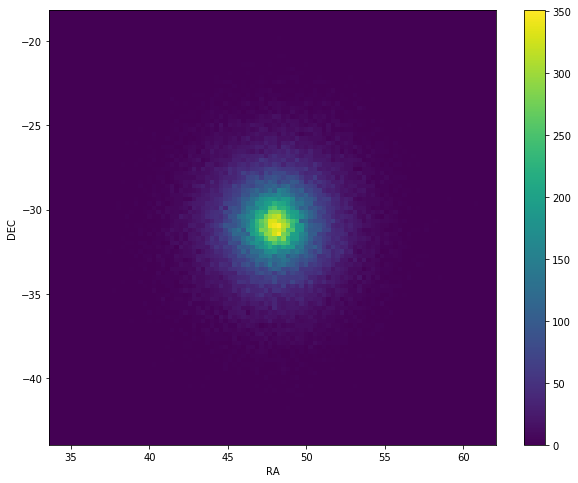

In [3]:
import random
import numpy as np
import matplotlib.pyplot as plt

# define constants as above
alpha = 1.87
k = 0.0001
A = 1/(4.14575*10**(-6))
E_c = 81
P = 100000

#define function to describe the normalized spectrum othe PSR B1509-58
def F(E):
    return A*k*pow(E, -alpha)*np.exp(-E/E_c)

#declare array to contain values of the energies of the accepted simulated particles
E_array = []

#declare variable to keep track of the number of particles accepted
paccepted = 0

while paccepted < P: #while the number of particles accepted is below the acceptable threshold
    trial_E = random.uniform(20,500) #take a random energy value between 20keV and 500 keV
    trial_F = random.uniform(0,0.0695405) #take values of F between 0 and its maximum value on the interval
    if trial_F < F(trial_E): #if the randomly selected point is below the F curve
        E_array.append(trial_E) #append the randomly selected point into the array
        paccepted += 1 #and increment the number of particles accepted

# define function to keep track of gaussian spread of position values at a given energy
def FF(x, mu, sigma):
    return (1/np.sqrt(2*np.pi*sigma**2))*np.exp(-((x-mu)**2)/(2*sigma**2))

#declare arrays to store values of accepted RA and DEC coordinates
RA_values = []
DEC_values = []

#define the center positions of the gaussians
mu_RA = 48.04
mu_DEC = -30.92


for i in range(0,len(E_array)): #for photons with energies distributed according to the spectrum
    E = E_array[i]
    sigma = (E/100)**(-0.8) #modify sigma for the energy value of the given itteration
    RAaccepted = False
    DECaccepted = False
    while RAaccepted == False: #loop until a valid RA value is found
        trial_RA = random.uniform(mu_RA-4*sigma,mu_RA+4*sigma)
        trial_FF = random.uniform(0,1/np.sqrt(2*np.pi*sigma**2))
        if trial_FF < FF(trial_RA, mu_RA, sigma):
            RA_values.append(trial_RA)
            RAaccepted = True
    while DECaccepted == False: #loop until a valid DEC value is found
        trial_DEC = random.uniform(mu_DEC-4*sigma,mu_DEC+4*sigma)
        trial_FF = random.uniform(0,1/np.sqrt(2*np.pi*sigma**2))
        if trial_FF < FF(trial_DEC, mu_DEC, sigma):
            DEC_values.append(trial_DEC)
            DECaccepted = True

#create a 2-D histogram of the RA and DEC values
#note that the RA and DEC value of the same index in their respective arrays were generated from the same E value
plt.figure(figsize=(10,8))
plt.hist2d(RA_values, DEC_values, bins = 100)
plt.colorbar()
plt.xlabel('RA')
plt.ylabel('DEC')
plt.show()

### Part d:

How might one experimentally determine the LAT’s PSF? Due to the uniquepulsating nature of pulsars, their position can be measured to extreme accuracyin other wavelengths.  “Photon gating” can be used to select photons highlylikely to originate from the pulsar.  Put together, this can be studied to arriveat the PSF. To increase statistics, LAT scientists “cut out” multiple pulsars, andanalyzed the data as a single generic source in a technique known as “stack-ing.” If you wanted to “cut out” PSR B1509-58 in such a way that you kept 95%of the data, what radius around the pulsar would you use?

In [4]:
import numpy as np

#convert lists to arrays
RA_array = np.asarray (RA_values) 
DEC_array = np.asarray (DEC_values)

#define new array that stores the distance each pair of RA and DEC coordinates are from the location of the pulsar
Magnitude = np.sqrt((RA_array-mu_RA)**2 + (DEC_array-mu_DEC)**2)

#sort the list from smallest distance to largest
sorted(Magnitude)

index = int(.95*len(Magnitude))

#select the 95th percentile distance
radius = Magnitude[index]

#print the 9th percentile distance (this is the radius at which 95% of the photons from the pulsar would be kept)
print (Magnitude[index])

1.5461561657811733


## Exercise 2: Compton Scattering

Compton scattering is the inelastic scattering of a photon by a charged particle, usually an electron. The scattering angle of the electron ($\phi$) depends on the initial energy of the photon $(E)$ and its scattered energy ($E'$).

$$\cos(\phi) = \frac{E^2 - E'^2 + K^2(1+2E_0/K)}{2EK\sqrt{1+2E_0/K}}$$

where $K=2.5 \mathrm{keV}$ and $E_0 = 511 \mathrm{keV}$ is the electron rest mass.

Suppose that X-rays are incident on a rarget and undergo Compton scattering from the atomic electrons.

### Part a:

Calculate the scattered energy $E'$ if $E = 100 \mathrm{keV}$ and $\phi = 73^{\circ}$. For each iteration step $i$, printout $E'_i$ and $\Delta = |E'_i - E'_{i-1}|$.

To do this, we convert the equation above to:

$$ \cos(\phi) - \frac{E^2 - E'^2 + K^2(1+2E_0/K)}{2EK\sqrt{1+2E_0/K}} = 0 $$

We will use the bisection method by making use of the fact that the function on the LHS of the above equation is less than zero when evaluated at $E'=80\mathrm{keV}$ and is greater than zero when evaluated at $E'=120\mathrm{keV}$.

In [57]:
# MODIFIED FROM LECTURE

import numpy as np

#define variables as above
K = 2.5
E_0 = 511
E = 100
phi = np.deg2rad(73)

# define function for which we want to find the roots
def f(E_prime):
    return np.cos(phi) - (E**2 - E_prime**2 + (K**2)*(1+2*E_0/K))/(2*E*K*np.sqrt(1+2*E_0/K))

# define function that finds bisection 
#Eminus is the lower bound of the energy range
#Eplus is the upper bound of the energy range
#Nmax is maximum number of loops before the program terminates
#eps is the desired distance of convergence to the true value
def bisection (Eminus, Eplus, Nmax, eps):
    for it in range(0, Nmax): #DO NOT loop more than Nmax times
        E_prime = (Eminus + Eplus)/2 #store center point of the E range
        print("iteration %2d: E' = %.6f keV and f(E) = %9.6f" % (it, E_prime, f(E_prime))) #print the value of E' and f(E')
        if (f(Eplus)*f(E_prime))>0: #if the root is in the left half of the E' range                    
            Eplus=E_prime #set the upper bound of the E' range to the former midpoint of the E' range
        else: #if the root is in the upper half of the E' range
            Eminus=E_prime #set the lower bound of the E' range to the former midpoint of the E' range                   
        if(Eplus-Eminus<eps): #When the lower and upper bounds of the E range are sufficiently close                        
            print("root found with precision eps = ",eps) #print the final value of the root of E' (which is to eps precision)
            break #leave the for loop
        if it==Nmax-1: #print failure message if the program loops Nmax times
             print("root not found after Nmax iterations ") 
    return E_prime  #return the value of E'

eps=1e-6 #desired precision
a=80 #lower bound of bisection (f(E') < 0)
b=120 #upper bound of bisection (f(E') > 0)
Nmax=100 #maximum number of itterations allowed
root=bisection(a, b, Nmax, eps) #run the function defined above
print("E' =",root, 'keV') #print the rot value

iteration  0: E' = 100.000000 keV and f(E) =  0.039328
iteration  1: E' = 90.000000 keV and f(E) = -0.148387
iteration  2: E' = 95.000000 keV and f(E) = -0.056999
iteration  3: E' = 97.500000 keV and f(E) = -0.009453
iteration  4: E' = 98.750000 keV and f(E) =  0.014783
iteration  5: E' = 98.125000 keV and f(E) =  0.002626
iteration  6: E' = 97.812500 keV and f(E) = -0.003423
iteration  7: E' = 97.968750 keV and f(E) = -0.000401
iteration  8: E' = 98.046875 keV and f(E) =  0.001112
iteration  9: E' = 98.007812 keV and f(E) =  0.000355
iteration 10: E' = 97.988281 keV and f(E) = -0.000023
iteration 11: E' = 97.998047 keV and f(E) =  0.000166
iteration 12: E' = 97.993164 keV and f(E) =  0.000072
iteration 13: E' = 97.990723 keV and f(E) =  0.000024
iteration 14: E' = 97.989502 keV and f(E) =  0.000001
iteration 15: E' = 97.988892 keV and f(E) = -0.000011
iteration 16: E' = 97.989197 keV and f(E) = -0.000005
iteration 17: E' = 97.989349 keV and f(E) = -0.000002
iteration 18: E' = 97.98942

### Part b:

Repeat the calculation for scattering from a nuclear proton in hydrogen, with $E_0 = 938 \mathrm{MeV}$.

We will use the bisection method by making use of the fact that, for the $E_0 = 938 \mathrm{MeV}$, $f(E')$ is less than zero when evaluated at $E'=80\mathrm{keV}$ and is greater than zero when evaluated at $E'=120\mathrm{keV}$.

In [56]:
# MODIFIED FROM LECTURE (see comments above)

import numpy as np

K = 2.5
E_0 = 938*10**3
E = 100
phi = np.deg2rad(73)

def f(E_prime):
    return np.cos(phi) - (E**2 - E_prime**2 + (K**2)*(1+2*E_0/K))/(2*E*K*np.sqrt(1+2*E_0/K))


def bisection (Eminus, Eplus, Nmax, eps):
    for it in range(0, Nmax):
        E_prime = (Eminus + Eplus)/2
        print("iteration %2d: E' = %.6f keV and f(E') = %9.6f" % (it, E_prime, f(E_prime)))
        if (f(Eplus)*f(E_prime))>0:                    
            Eplus=E_prime
        else:
            Eminus=E_prime                    
        if(Eplus-Eminus<eps):                        
            print("root found with precision eps = ",eps)
            break
        if it==Nmax-1:
             print("root not found after Nmax iterations ")   
    return E_prime  

eps=1e-6
a=0
b=10**6
Nmax=100
root=bisection(a, b, Nmax, eps)
print("E' =",root, 'keV')

iteration  0: E' = 500000.000000 keV and f(E') = 577185.427155
iteration  1: E' = 250000.000000 keV and f(E') = 144288.437593
iteration  2: E' = 125000.000000 keV and f(E') = 36064.190203
iteration  3: E' = 62500.000000 keV and f(E') = 9008.128355
iteration  4: E' = 31250.000000 keV and f(E') = 2244.112893
iteration  5: E' = 15625.000000 keV and f(E') = 553.109028
iteration  6: E' = 7812.500000 keV and f(E') = 130.358062
iteration  7: E' = 3906.250000 keV and f(E') = 24.670320
iteration  8: E' = 1953.125000 keV and f(E') = -1.751615
iteration  9: E' = 2929.687500 keV and f(E') =  9.257524
iteration 10: E' = 2441.406250 keV and f(E') =  3.202497
iteration 11: E' = 2197.265625 keV and f(E') =  0.587827
iteration 12: E' = 2075.195312 keV and f(E') = -0.616298
iteration 13: E' = 2136.230469 keV and f(E') = -0.022836
iteration 14: E' = 2166.748047 keV and f(E') =  0.280345
iteration 15: E' = 2151.489258 keV and f(E') =  0.128217
iteration 16: E' = 2143.859863 keV and f(E') =  0.052556
itera

## Exercise 3: Quantum Monte Carlo

The hydrogen atom (1-electron atom) is one of the simplest quantum mechanical
systems, and the ground state energy of hydrogen can be estimated via the variational
method, wherein we calculate the local energy of a trial state function and
search for a minimum value:

$$<E_L> = \frac{1}{\psi_T}H\psi_T $$

This minimum value apporimates the true energy given by $<H>$.

The 3-dimensional version of Schrodinger's equation leads to the following Hamiltonian for this system:

$$ H = -\frac{1}{2} \frac{\partial^2}{\partial \rho^2} - \frac{1}{\rho} + \frac{l(l+1)}{2 \rho^2} $$

A suitable trial function for the hydrogen atom ground state might be

$$u_T(\rho) = \alpha \rho e^{-\alpha \rho}$$

### Part a:

With this trial function, show that the local energy operator $E_L$ can be written as

$$E_L
(\rho) = - \frac{1}{\rho}-\frac{\alpha}{2} \bigg(\alpha - \frac{2}{\rho} \bigg)$$

and that

$$ <H> = \int_0^\infty P(\rho)E_L(\rho)d\rho $$

where $P(\rho)$ is the probability density.

--------------------------------------------------------------------------------------------
From $<E_L> = \frac{1}{\psi_T}H\psi_T $, noting that $l=0$ for the ground state, and taking $\psi_T = u_T(\rho)$ we find:

$$ E_L(\rho) = \frac{\frac{1}{2} \left(2 \alpha ^2 e^{-\alpha  \rho }-\alpha ^3 \rho  e^{-\alpha  \rho }\right) - \alpha  e^{-\alpha  \rho }}{\alpha  \rho  e^{-\alpha  \rho }}$$

which, with some simplification, becomes

$$ \frac{-\alpha ^2 \rho +2 \alpha -2}{2 \rho } $$


which is equal to:

$$- \frac{1}{\rho}-\frac{\alpha}{2} \bigg(\alpha - \frac{2}{\rho} \bigg)$$

QED

-----------------------------------------------------------------------



By the standard definition

$$ <H> = \int_0^\infty \psi_T(\rho)^* H \psi_T(\rho) d\rho$$

From $<E_L> = \frac{1}{\psi_T}H\psi_T $ we find that

$$H\psi_T = <E_L>\psi_T$$

so

$$ <H> = \int_0^\infty \psi_T(\rho)^*\psi_T(\rho) E_L(\rho) d\rho$$

which means that 

$$ <H> = \int_0^\infty P(\rho) E_L(\rho) d\rho$$

where $P(\rho) = |\psi_T^2|$

Note that $P(\rho)$ is normalized by $4 \alpha$ so we re-define $P(\rho)$ to be:

$$P(\rho) = 4 \alpha ^3 \rho ^2 e^{-2 \alpha  \rho }$$

### Part b:

Use Monte Carlo integration to evaluate <H> as a function of $\alpha$, thereby finding the ground state energy.

In [68]:
# define normalized probability distrobution
def P(rho, alpha):
    return 4*alpha*(alpha * rho * np.exp(-alpha*rho))**2

# define integrand
def EL(rho, alpha):
    return -(1/rho)-(alpha/2)*(alpha-(2/rho))


########################TEST THAT VonNeuman WORKS HERE#################
alpha = 2.0
rho_values = []

rhoaccepted = 0

R=1000000

while rhoaccepted < R:
    trial_rho = random.uniform(0, 5)
    trial_P = random.uniform(0, alpha * trial_rho)
    if trial_P < P(trial_rho, alpha):
        rho_values.append(trial_rho)
        rhoaccepted += 1

elsum = 0

for i in range(0, len(rho_values)):
    rho = rho_values[i]
    elsum += EL(rho, alpha)

result = elsum/len(rho_values)
    
print (alpha, result)

2.0 1.9892625912888733


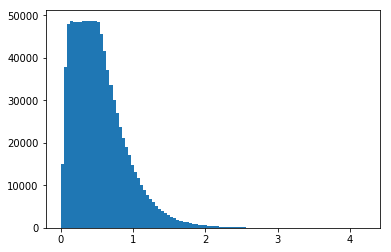

In [69]:
##################CHECK THAT PLOT LOOKS REASONABLE#####################
plt.hist(rho_values, bins = 100)
plt.show()

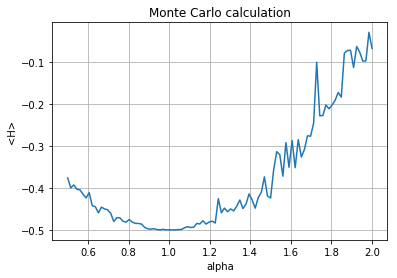

In [70]:
R = 1000 #number of rho values that will be generated

alpha_values = [] #list to contain values of alpha at which the integral is checked
EL_exp_values = [] #list to contain value of the expectation values of the ground state energy at various alpha values

for alpha in np.linspace(0.5, 2, 100): #itterate over alpha with 100 even steps from 0.5 to 2
    rhoaccepted = 0 #variable to keep track of the number of rho values accepted so far in the itteration
    rho_values = [] #list to store rho values for this itteration
    while rhoaccepted < R: #keep looking for rho values until R such values are accepted
        trial_rho = random.uniform(0, 5/alpha) #check a random rho between 0 and 5/alpha (the upper bound is chose because it decreases as the spread the exponential in P(rho) decays faster)
        trial_P = random.uniform(0, np.exp(-2)*4*alpha) # chack a P value between 0 and the maximum possible P value
        if trial_P < P(trial_rho, alpha): # so long as the randomly generated point is below the actual P curve
            rho_values.append(trial_rho) #append the rho value of this point to the list of accepted rho values
            rhoaccepted += 1 # and increment the accepted rho value counter
    
    elsum = 0 #define variable to keep track of the sum of the integrand when evaluated at the rho values just found

    for i in range(0, len(rho_values)): # for all the rho values just found
        rho = rho_values[i]
        elsum += EL(rho, alpha) #evaluate the integrand for the rho value and add to the running sum
    result = elsum/len(rho_values) #take te result to be the average value of the sum
    #print(alpha, result)
    alpha_values.append(alpha) #append the current value of alpha to the list of alpha values
    EL_exp_values.append(result) # append the result of the integral to the list of integral values
    
#plot the value of the integral as it varies with alpha
plt.plot(alpha_values, EL_exp_values)
plt.xlabel('alpha')
plt.ylabel('<H>')
plt.title("Monte Carlo calculation")
plt.grid()
plt.show()

The minimum value of $<H>$ appears to occur around $\alpha = 1$. This value is approxiamtely:

$$<E_L>=-\frac{e^2}{8 \pi \epsilon_0 a_0}$$